In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [6]:
titanic.shape

(891, 7)

In [7]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64

In [8]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


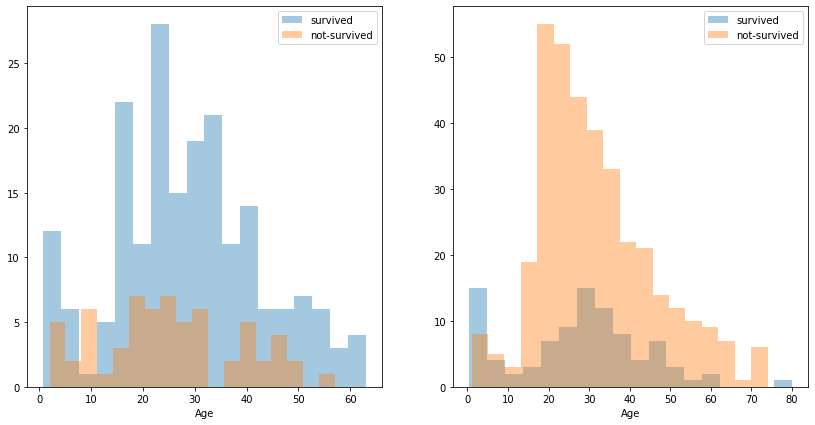

In [9]:
women = titanic[titanic['Sex'] == 'female']
men = titanic[titanic['Sex'] == 'male']
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
ax = sb.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], 
                  kde =False)
ax = sb.distplot(women[women['Survived'] == 0].Age.dropna(), bins=18, label = 'not-survived', ax = axes[0], 
                  kde =False)
ax.legend()
ax = sb.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], 
                  kde =False)
ax = sb.distplot(men[men['Survived'] == 0].Age.dropna(), bins=18, label = 'not-survived', ax = axes[1], 
                  kde =False)
ax.legend()

<AxesSubplot:xlabel='Survived', ylabel='count'>

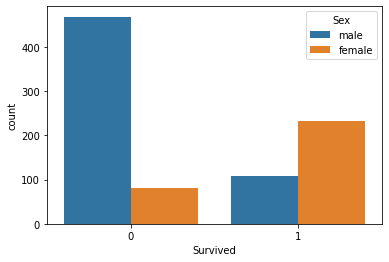

In [10]:
sb.countplot(x='Survived', hue='Sex', data=titanic)

In [11]:
women_survivor_age = titanic.index[(titanic['Sex']=='female') & 
                                   (titanic['Age'].isnull()) & (titanic['Survived']==1)]
print(women_survivor_age)
women_survivor_mean = titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)].Age.mean()
titanic.loc[women_survivor_age, 'Age'] = titanic.loc[women_survivor_age]['Age'].fillna(women_survivor_mean)

Int64Index([ 19,  28,  31,  32,  47,  82, 109, 128, 166, 186, 198, 241, 256,
            274, 300, 303, 306, 330, 334, 347, 358, 359, 367, 368, 375, 431,
            457, 533, 573, 596, 612, 653, 669, 697, 727, 849],
           dtype='int64')


In [12]:
women_nonsurvivor_age = titanic.index[(titanic['Sex']=='female') & 
                                   (titanic['Age'].isnull()) & (titanic['Survived']==0)]
print(women_nonsurvivor_age)
women_nonsurvivor_mean = titanic[(titanic['Sex']=='female') & (titanic['Survived']==0)].Age.mean()
titanic.loc[women_nonsurvivor_age,'Age'] = titanic.loc[women_nonsurvivor_age]['Age'].fillna(women_nonsurvivor_mean)

Int64Index([140, 180, 229, 235, 240, 264, 409, 415, 485, 502, 564, 578, 593,
            680, 792, 863, 888],
           dtype='int64')


In [13]:
men_survivor_age = titanic.index[(titanic['Sex']=='male') & 
                                   (titanic['Age'].isnull()) & (titanic['Survived']==1)]
print(men_survivor_age)
men_survivor_mean = titanic[(titanic['Sex']=='male') & (titanic['Survived']==1)].Age.mean()
titanic.loc[men_survivor_age, 'Age'] = titanic.loc[men_survivor_age]['Age'].fillna(men_survivor_mean)

Int64Index([17, 36, 55, 65, 107, 298, 301, 444, 507, 547, 643, 692, 709, 740,
            828, 839],
           dtype='int64')


In [14]:
men_nonsurvivor_age = titanic.index[(titanic['Sex']=='male') & 
                                   (titanic['Age'].isnull()) & (titanic['Survived']==0)]
print(men_nonsurvivor_age)
men_nonsurvivor_mean = titanic[(titanic['Sex']=='male') & (titanic['Survived']==0)].Age.mean()
men_nonsurvivor_mean
titanic.loc[men_nonsurvivor_age, 'Age'] = titanic.loc[men_nonsurvivor_age]['Age'].fillna(men_nonsurvivor_mean)

Int64Index([  5,  26,  29,  42,  45,  46,  48,  64,  76,  77,
            ...
            793, 815, 825, 826, 832, 837, 846, 859, 868, 878],
           dtype='int64', length=108)


In [15]:
onehotencoder = preprocessing.OneHotEncoder()
X = onehotencoder.fit_transform(titanic['Sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
titanic = pd.concat([titanic, df], axis=1)
titanic.drop(['Sex'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,female
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [16]:
X = onehotencoder.fit_transform(titanic['Pclass'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int))
df.head()
titanic = pd.concat([titanic, df], axis=1)
titanic.drop(['Pclass'], axis=1, inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,female,0,1,2
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
titanic['Age'] = titanic['Age'].astype(int)
titanic.loc[ titanic['Age'] <= 11, 'Age'] = 0
titanic.loc[(titanic['Age'] > 11) & (titanic['Age'] <= 18), 'Age'] = 1
titanic.loc[(titanic['Age'] > 18) & (titanic['Age'] <= 22), 'Age'] = 2
titanic.loc[(titanic['Age'] > 22) & (titanic['Age'] <= 27), 'Age'] = 3
titanic.loc[(titanic['Age'] > 27) & (titanic['Age'] <= 33), 'Age'] = 4
titanic.loc[(titanic['Age'] > 33) & (titanic['Age'] <= 40), 'Age'] = 5
titanic.loc[(titanic['Age'] > 40) & (titanic['Age'] <= 66), 'Age'] = 6
titanic.loc[ titanic['Age'] > 66, 'Age'] = 6

In [18]:
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)   
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

In [22]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[137,  17],
       [ 39,  75]], dtype=int64)